# Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Load the data files
train_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')
sample_submission_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/sample_submission.csv')



# Head and info  of the  data 

In [2]:
train_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              1381 non-null   float64
 1   word_freq_address           1381 non-null   float64
 2   word_freq_all               1381 non-null   float64
 3   word_freq_3d                1381 non-null   float64
 4   word_freq_our               1381 non-null   float64
 5   word_freq_over              1381 non-null   float64
 6   word_freq_remove            1381 non-null   float64
 7   word_freq_internet          1381 non-null   float64
 8   word_freq_order             1381 non-null   float64
 9   word_freq_mail              1381 non-null   float64
 10  word_freq_receive           1381 non-null   float64
 11  word_freq_will              1381 non-null   float64
 12  word_freq_people            1381 non-null   float64
 13  word_freq_report            1381 

# Data Preprocessing

In [4]:
# Prepare training data
X_train = train_df.drop(columns=['spam', 'ID'])
y_train = train_df['spam']

# Prepare test data
X_test = test_df.drop(columns=['ID'])
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Random Forest model

In [5]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

# Evaluation

In [6]:


# Make predictions on the test data
test_predictions = rf.predict(X_test_scaled)
# Calculate F1 score on the training data
train_predictions = rf.predict(X_train_scaled)
f1 = f1_score(y_train, train_predictions)




# Confusion Matrix &  Feature Importances

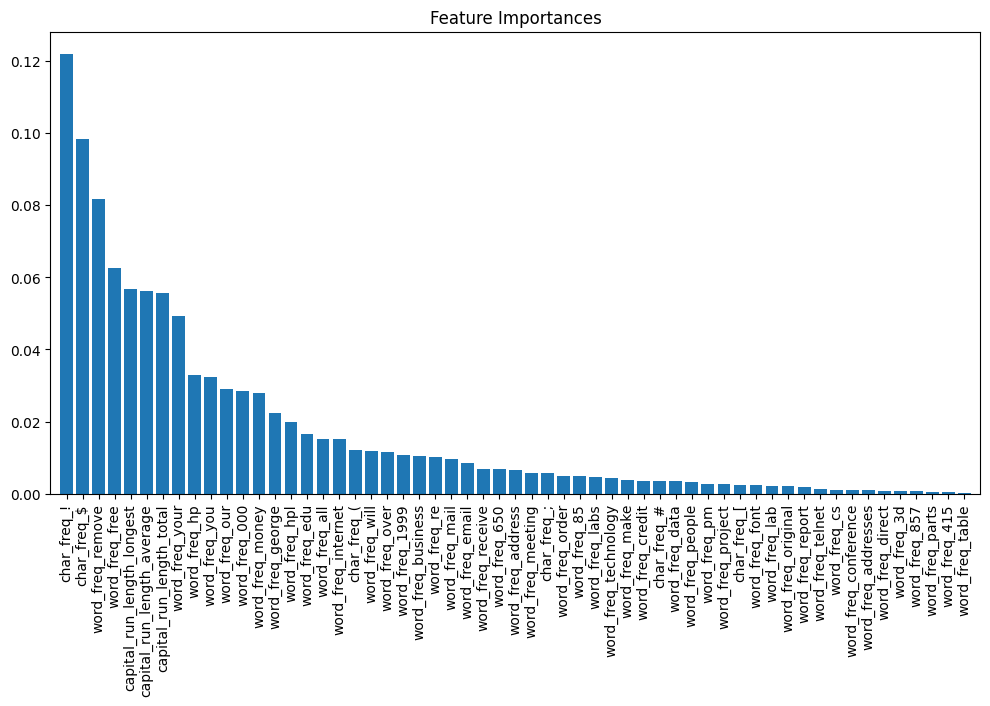

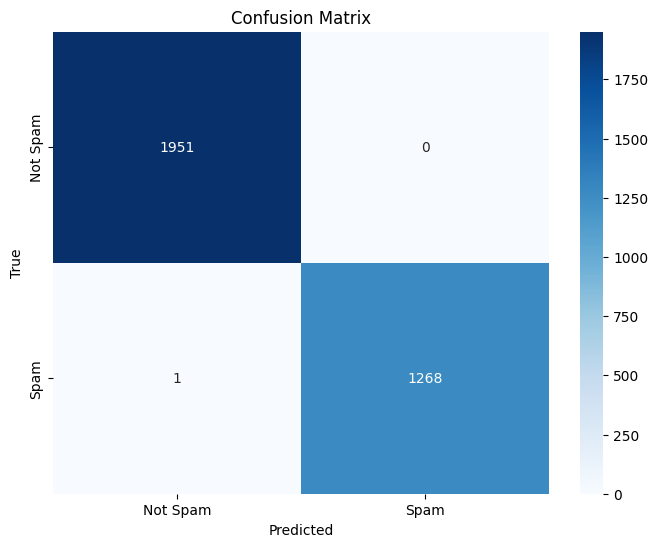

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Feature Importance Plot
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Distribution of Predictions
def plot_prediction_distribution(train_predictions, test_predictions):
    plt.figure(figsize=(12, 6))
    sns.histplot(train_predictions, bins=2, kde=False, color='blue', label='Train Predictions')
    sns.histplot(test_predictions, bins=2, kde=False, color='orange', label='Test Predictions')
    plt.legend(loc='best')
    plt.xlabel('Predicted Class')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predictions')
    plt.show()

# Plot Feature Importance
plot_feature_importance(rf, X_train.columns)

# Plot Confusion Matrix
plot_confusion_matrix(y_train, train_predictions, labels=['Not Spam', 'Spam'])

 


# File submit 

In [8]:
# Prepare the submission file
submission_df = sample_submission_df.copy()
submission_df['spam'] = test_predictions
# Save the submission file
submission_file_path = 'submission_svm.csv'
submission_df.to_csv(submission_file_path, index=False)

# Print F1 score and submission file path
print(f'F1 Score on training data: {f1}')
print(f'Submission file saved to: {submission_file_path}')

F1 Score on training data: 0.9996058336618052
Submission file saved to: submission_svm.csv
